# TD/TP 2 : régression linéaire multiple
UE Modèle linéaire
Auteur : Antoine Legendre
Aix-Marseille Université / Faculté des Sciences




:::{.callout-warning}
Pensez à mettre votre nom dans l'entête du document.
:::


In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Exercice 1 : utilisation de la régression linéaire multiple

Reprendre, si ce n'était pas déjà fait, le dernier exercice de la fiche précédente sur le QI d'enfants des États-unis.

**1.** Dans le bloc ci-dessous, on redonne les commandes pour importer les données. Ensuite, on ajuste un modèle de régression linéaire multiple. De quel modèle s'agit-il ?


In [3]:
kidiq = pd.read_csv('kidiq.csv', sep=",")
kidiq['mom_hs_num'] = kidiq['mom_hs']
kidiq['mom_hs'] = kidiq['mom_hs'].astype('category')
kidiq['mom_work'] = kidiq['mom_work'].astype('category')

reg3 = smf.ols('kid_score ~ mom_iq * mom_hs', data = kidiq).fit()
print(np.sqrt(reg3.scale))
print(reg3.summary())

17.971466247249246
                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.07e-24
Time:                        08:20:57   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept        

Il s'agit d'une régression linéaire multiple de la forme $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \varepsilon $$ où :
- $ Y $ est 'kidscore'
- $ X_1 $ est {'mom_hs' = 1}
- $ X_2 $ est 'mom_iq'
- $ X_3 $ est le produit $ X_1X_2 $

**2.** Dans ce modèle, l'ordonnée à l'origine représente la moyenne de deux-sous populations fictives de paires mères-enfants. Donner la formule mathématiques en terme d'espérance conditionnelle et l'interpréter. Quelle remarque importante doit-on faire ici sur la valeur de `mom_iq` ? Le $t$-test de nullité de cet intercept a-t-il un intérêt ?

L'ordonnée à l'origine est $ \beta_0 = \mathbb{E}[Y | X_1 = 0, X_2 = 0] $. 

Un QI nul n'a pas de sens. D'où un Y prédit qui est négatif.

Le t-test de nullité de l'ordonnée à l'origine n'a pas de sens car cela revient à tester si les enfants dont les mères ont un QI nul et n'ont pas suivi d'études ont un QI éloigné de 0.

**3.** Ce modèle permet d'obtenir deux droites de régression, en fonction de la valeur de `mom_hs`. Donner les équations estimées des deux droites.

Sachant que 'mom_hs' vaut 1, le modèle devient $ Y = (\beta_0 + \beta_1) + (\beta_2 + \beta_3) X_3 $.

Sachant que 'mom_hs' vaut 0, le modèle devient $ Y = \beta_0 + \beta_2 X_2 $.



**4.** Représenter graphiquement les deux nuages de points et les deux droites estimées, en changeant la couleur suivant `mom_iq`. 


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

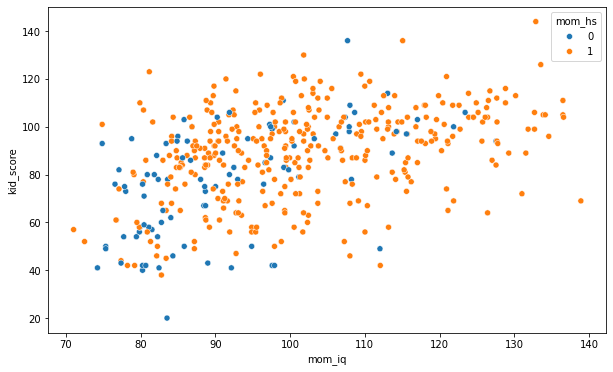

In [4]:
# Extraire les coefficients
intercept = reg3.params['Intercept']
slope_mom_iq = reg3.params['mom_iq']
intercept_mom_hs = reg3.params['mom_hs[T.1]']
slope_interaction = reg3.params['mom_iq:mom_hs[T.1]']

# Créer le scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=kidiq, x='mom_iq', y='kid_score', hue='mom_hs')

# Obtenir les couleurs des points
palette = scatter.get_legend().get_texts()
color_no = scatter.get_lines()[0].get_color()
color_yes = scatter.get_lines()[1].get_color()

# Ajouter les lignes de régression
x_vals = pd.Series(plt.gca().get_xlim())
y_vals1 = slope_mom_iq * x_vals + intercept
y_vals2 = (slope_mom_iq + slope_interaction) * x_vals + (intercept + intercept_mom_hs)

plt.plot(x_vals, y_vals1, color=color_no)
plt.plot(x_vals, y_vals2, color=color_yes)

plt.xlabel('mom_iq')
plt.ylabel('kid_score')
plt.show()

On peut également faire ce graphique en une seule ligne avec la commande ci-dessous.


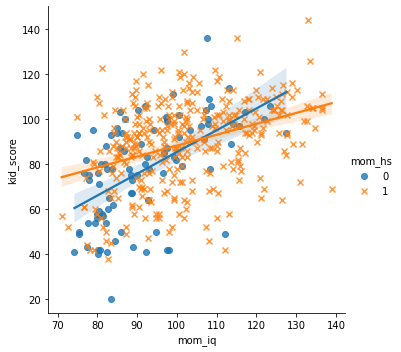

In [5]:
sns.lmplot(data=kidiq, x='mom_iq', y='kid_score', hue='mom_hs', markers=["o", "x"])

**5.** Quelles vérifications graphiques doit-on faire pour pouvoir utiliser les intervalles de confiance et de prédiction ? Le faire et conclure.


/tmp/ipykernel_6440/1735490265.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red')


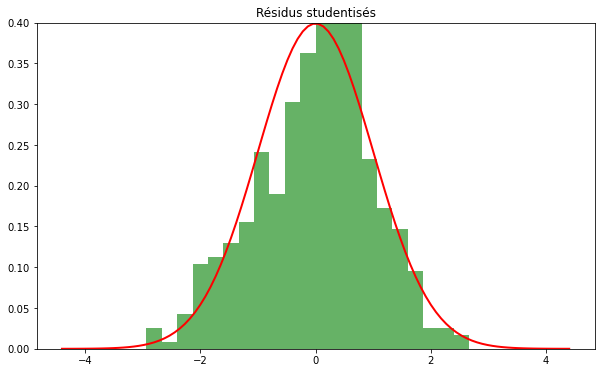

<Figure size 720x432 with 0 Axes>

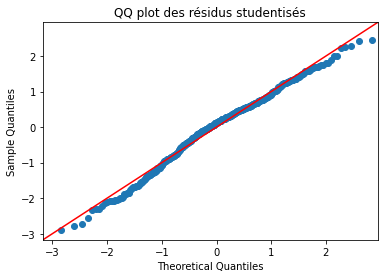

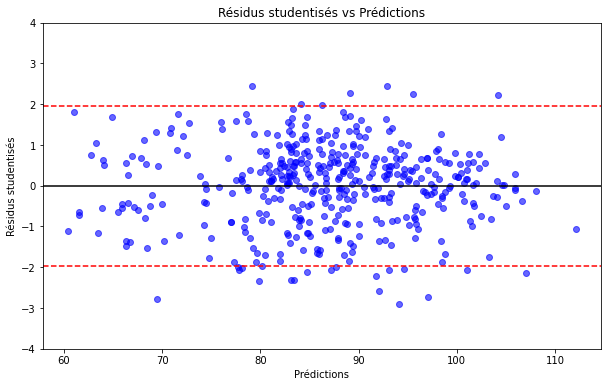

In [6]:
from scipy.stats import norm
residus_student = reg3.get_influence().resid_studentized_internal
predictions = reg3.predict()

plt.figure(figsize=(10, 6))
plt.hist(residus_student, bins=30, density=True, alpha=0.6, color='g', range=(-4, 4))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, color='red')
plt.title('Résidus studentisés')
plt.ylim(0, 0.4)
plt.show()

plt.figure(figsize=(10, 6))
sm.qqplot(residus_student, line='45')
plt.title('QQ plot des résidus studentisés')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residus_student, alpha=0.6, color='b')
plt.axhline(y=-1.96, color='red', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1.96, color='red', linestyle='--')
plt.ylim(-4, 4)
plt.xlabel('Prédictions')
plt.ylabel('Résidus studentisés')
plt.title('Résidus studentisés vs Prédictions')
plt.show()

**6.** On note $\theta = \beta_\texttt{mom\_iq} + \beta_\texttt{mom\_iq:mom\_hs1}$ la pente de la droite lorsque la mère a obtenu son diplôme. 

On rappelle que la matrice de variance-covariance de $\widehat{\boldsymbol\beta}$ est 
$$
\mathbb{V}(\widehat{\boldsymbol\beta}) = \sigma^2 \mathbf V, \quad \text{où }\mathbf V = \mathbf x'\mathbf x.
$$
La matrice $\mathbf V$ et l'estimation $\widehat\sigma$ de l'écart-type de l'erreur s'obtiennent avec les commandes ci-dessous.


In [7]:
V = reg3.normalized_cov_params
hat_sigma = np.sqrt(reg3.scale)
print(V)
print(hat_sigma)

                    Intercept  mom_hs[T.1]    mom_iq  mom_iq:mom_hs[T.1]
Intercept            0.586060    -0.586060 -0.006261            0.006261
mom_hs[T.1]         -0.586060     0.728361  0.006261           -0.007624
mom_iq              -0.006261     0.006261  0.000068           -0.000068
mom_iq:mom_hs[T.1]   0.006261    -0.007624 -0.000068            0.000081
17.971466247249246


Écrire $\theta$ mathématiquement sous la forme $\mathbf T\boldsymbol\beta$, puis proposer un intervalle de confiance pour $\theta$. 

On rappelle que
$$
\mathbb{V}(\mathbf T\widehat{\boldsymbol\beta})=
\mathbf T \mathbb{V}(\widehat{\boldsymbol\beta}) \mathbf T' =
\sigma^2 \mathbf T \mathbf V \mathbf T'
$$


**7.** Quelle est l'intention du statisticien qui veut tester ces hypothèses ?
$$
H_0 : \theta \ge 1 
\quad \text{vs.} \quad
H_1 : \theta < 1.
$$

Construire le test, calculer la $p$-value et conclure.


## Exercice 2 : production d'arbres mesquites

L'arbre mesquite fait partie de la famille des légumineuses, qui produit des gousses de haricots. Ces petits arbres sont endogènes de certaines régions désertiques et montagneuses du sud de l'Amérique du Nord. Son aire naturelle de répartition géographique va du Nord du Mexique jusqu'au Kansas.

On s'intéresse aux variables ci-dessous sur différents plants, collectées en deux lots :

- `weight` : biomasse produite (mesurée après récolte)
- `diam1` : plus long diamètre horizontal de la canopée (partie feuillue de l'arbre), en mètre,
- `diam2` : plus court diamètre horizontal de la canopée
- `canopy_height` : hauteur de la canopée
- `total_height` : hauteur totale
- `density` : densité d'arbres par unité d'exploitation (en nombres d'arbre par unité de surface)
- `group` : lot de l'étude (MCD pour le 1er lot, ALS pour le second).

Le premier lot correspond à des mesures faites sur 26 arbres juste avant la récolte. Le second lot correspond à des mesures faites sur 20 arbres à une autre date.

Voici comment importer les données.


In [9]:
mesquite = pd.read_csv("mesquite.dat", delim_whitespace=True)
mesquite['group'] = mesquite['group'].astype('category')

/tmp/ipykernel_6440/1396179976.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mesquite = pd.read_csv("mesquite.dat", delim_whitespace=True)


La mesure d'intérêt (la biomasse) est beaucoup plus compliquée à obtenir que les autres variables, puisqu'il faut faire une récolte. On souhaite donc construire des modèles qui permettent de prédire la biomasse à partir des autres variables. Pour cela, on va ajuster, étudier et comparer différents modèles de régression permettant de prédire la biomasse. On essaie ici de répondre à deux questions :

- doit-on transformer les variables à l'échelle logarithmique ?
- doit-on introduire de nouvelles variables fonction des variables mesurées ?



**1.** Ajuster un premier modèle linéaire où `weight` est prédit linéairement à partir des autres covariables. Que pensez-vous de ce modèle ?


In [10]:
# Ajustement initial du modèle
modele_initial = smf.ols('weight ~ diam1 + diam2 + canopy_height + total_height + density + group', data=mesquite).fit()

# Résumé du modèle
print(modele_initial.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     36.34
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.73e-14
Time:                        10:50:40   Log-Likelihood:                -318.82
No. Observations:                  46   AIC:                             651.6
Df Residuals:                      39   BIC:                             664.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1091.8880    176.456     -6.188

La valeur de $R^2$ ici, de l'ordre de $85\%$, est assez grande. Elle mesure la qualité des prédictions sur les observations utilisées pour ajuter le modèle. Or, il est attendu qu'un modèle prédise à-peu-près correctement les observations sur lesquelles il a été ajusté. En effet, l'ajustement du modèle revient à trouver les valeurs de $\boldsymbol\beta$ pour lesquelles les prédictions sont les plus proches des valeurs de $Y$ observées au sens des moindres carrés. Lorsqu'il y a plusieurs covariables et peu d'observations (comme dans ce jeu de données), le modèle ajusté peut donc ne pas être représentif de la population, mais uniquement être représentatif des données. Dans ce cas, on parle de **sur-apprentissage** : le modèle ajusté colle trop aux données pour être représentatif du phénomène général. 

On souhaite se **prémunir contre le sur-apprentissage**, c'est-à-dire évaluer la capacité de ce modèle à faire de bonnes prédictions sur de nouvelles données. Nous avons besoin de nouvelles données pour évaluer notre modèle, alors que notre table ne comporte que 46 observations. Faute d'avoir accès à de nouvelles données, il faut donc enlever des observations avant l'ajustement du modèle, pour ensuite pouvoir les utiliser comme "nouvelles données".

Parmis les méthodes pour réaliser ce programme, nous allons utiliser la validation croisée en mettant une observation de côté (ou *leave-one-out cross-validation*). Pour observation $i$ de la table initiale, il faut :

1. ajuster le modèle sans cette $i$-ème observation,
2. utiliser le modèle ajusté pour prédire la valeur de $Y$ pour cette $i$-ème observation,
3. enregister la valeur prédite.


**2.** À l'aide d'une boucle, faire ces opérations sur 46 observations de `mesquite` et enregistrer la $i$-ème prédiction dans `y_pred[i]`.


In [18]:
n = mesquite.shape[0]
y_pred = np.zeros(n)

for i in range(n):
   # Créer un sous-ensemble des données sans l'observation i
    mesquite_train = mesquite.drop(i)
    
    # Ajuster le modèle linéaire sur les données d'entraînement
    modele = smf.ols('weight ~ diam1 + diam2 + canopy_height + total_height + density + group', data=mesquite_train).fit()
    
    # Prédire la valeur pour l'observation i
    y_pred[i] = modele.predict(mesquite.iloc[i:i+1])[0]


KeyError: 0

**3.** Avec quelles nouvelles quantités, calculée sur ses prédictions, doit-on comparer $\widehat\sigma$ et $R^2$ ? Faire les calculs et conclure.


In [17]:
# Calcul de MSE
mse = np.mean((mesquite['weight'] - y_pred) ** 2)

# Calcul du R² ajusté
y_mean = mesquite['weight'].mean()
ss_total = np.sum((mesquite['weight'] - y_mean) ** 2)
ss_residual = np.sum((mesquite['weight'] - y_pred) ** 2)
r2_adjusted = 1 - (ss_residual / ss_total)

# Estimation de la variance des erreurs (sigma^2)
k = 7  # Le nombre de variables explicatives dans le modèle
sigma_squared = np.sum((mesquite['weight'] - y_pred) ** 2) / (n - k)

# Afficher les résultats
print(f"MSE: {mse}")
print(f"R² ajusté: {r2_adjusted}")
print(f"Estimation de sigma²: {sigma_squared}")


MSE: 713973.614981905
R² ajusté: -0.7661545668600036
Estimation de sigma²: 842122.7253632725


**4.** On s'intéresse maintenant à un modèle qui prédit la log-biomasse en fonction du logarithme de toutes les variables numériques et de `group`. Ajuster ce nouveau modèle.


In [23]:
log_vars = ['weight', 'diam1', 'diam2', 'canopy_height', 'total_height', 'density']
# Vérifier si des valeurs sont nulles ou négatives dans les variables à transformer
for col in log_vars:
    if (mesquite[col] <= 0).any():
        print(f"Attention: Des valeurs <= 0 trouvées dans {col}")
        mesquite[col] = mesquite[col].replace(0, np.nan)  # Remplacer les 0 par NaN (si nécessaire)
        mesquite = mesquite.dropna(subset=[col])  # Supprimer les lignes contenant NaN dans cette colonne


Attention: Des valeurs <= 0 trouvées dans diam1
Attention: Des valeurs <= 0 trouvées dans diam2
Attention: Des valeurs <= 0 trouvées dans canopy_height
Attention: Des valeurs <= 0 trouvées dans total_height
Attention: Des valeurs <= 0 trouvées dans density


In [24]:
from sklearn.linear_model import Ridge

# Sélectionner les variables indépendantes et la variable cible
X = mesquite[log_vars + ['group']].copy()
X = pd.get_dummies(X, drop_first=True)  # Créer des variables fictives pour 'group'
y = np.log(mesquite['weight'])

# Ajuster le modèle Ridge
ridge_model = Ridge(alpha=1.0)  # alpha est le paramètre de régularisation
ridge_model.fit(X, y)

# Afficher les coefficients du modèle Ridge
print("Coefficients Ridge:", ridge_model.coef_)
print("Intercept Ridge:", ridge_model.intercept_)


Coefficients Ridge: [0.025281   0.03699049 0.06017387 0.01982356 0.01646972 0.01421538
 0.01721773]
Intercept Ridge: 0.6330531347315091


In [25]:
# Appliquer le logarithme aux variables numériques
log_vars = ['weight', 'diam1', 'diam2', 'canopy_height', 'total_height', 'density']
mesquite[log_vars] = mesquite[log_vars].apply(np.log)

# Le modèle prend la log-biomasse (log(weight)) en fonction du logarithme des autres variables
# Et inclut également la variable 'group' comme variable catégorielle
# 'group' doit être une variable catégorielle (si elle ne l'est pas déjà)
mesquite['group'] = mesquite['group'].astype('category')

# Ajuster le modèle de régression linéaire
formula = 'np.log(weight) ~ np.log(diam1) + np.log(diam2) + np.log(canopy_height) + np.log(total_height) + np.log(density) + group'
modele = smf.ols(formula, data=mesquite).fit()

# Afficher les résultats du modèle
print(modele.summary())


/home/administrateur/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/administrateur/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/administrateur/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/administrateur/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/administrateur/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: zero-size array to reduction operation maximum which has no identity

Puis utiliser de nouveau une démarche de validation croisée pour étudier les qualités prédictives de ce second modèle. On enregistrera les prédictions dans le vecteur `logy_pred`. Commenter les résultats obtenus.


**5.** Les estimations de $\sigma$ par validation croisée ne sont pas comparables directement. En utilisant la fonction exponentielle pour quitter l'échelle logarithmique, calculer sur le second modèle une estimation de l'erreur de prédiction sur `weight`. 


Comparer ce nombre avec celui obtenu en question 3 et conclure quant au choix entre les deux modèles.

**6.** Proposer deux autres modèles qui utilisent les variables ci-dessous, les ajuster et prédire la biomasse sur les 46 observations avec une démarche de validation croisée.

$$
\texttt{canopy\_volume} = \texttt{diam1} \times \texttt{diam2} \times \texttt{canopy\_height} 
$$
$$
\texttt{canopy\_area} = \texttt{diam1} \times \texttt{diam2}
$$
$$
\texttt{canopy\_shape} = \texttt{diam1} / \texttt{diam2}
$$

Voici comment ajouter ces variables à la table :


In [9]:
mesquite['canopy_volume'] = mesquite['diam1'] * mesquite['diam2'] * mesquite['canopy_height']
mesquite['canopy_area'] = mesquite['diam1'] * mesquite['diam2']
mesquite['canopy_shape'] = mesquite['diam1'] / mesquite['diam2']

**7.** Comparer les 4 modèles ajustés et conclure.


## Exercice 3 : le théorème de Cochran

On rappelle deux résultats importants sur les vecteurs gaussiens.

- Toute transformation linéaire d'un vecteur gaussien est un vecteur gaussien.

- Un bloc de coordonnées d'un vecteur gaussien est indépendant d'un autre bloc de coordonnées si et seulement si la matrice de covariance entre ces deux blocs est nulle.

Voici le théorème de Cochran.

> Soit $\mathbf Z\sim\mathcal N_d(\boldsymbol\mu, \sigma^2 I_d)$ un vecteur gaussien de dimension $d$, dont les coordonnées sont indépendantes et de même variance $\sigma^2$. Soit $\Pi$ une matrice de projection orthogonale sur un sous-espace $F$ de dimension $d_1$ : $\Pi'=\Pi$, $\Pi^2 = \Pi$, $\text{tr}(\Pi)=d_1$.
>
> Dans ce cas, on rappelle que $(I_d - \Pi)$ est la projection orthogonale sur l'orthogonal de $F$, noté $F^\perp$, de dimension $d_2 = d - d_1$.
>
> Alors,
>
> - les vecteurs aléatoires $\Pi\mathbf Z$ et $(I_d - \Pi)\mathbf Z$ sont deux vecteurs gaussiens indépendants, de lois respectives
>
$$
      \Pi\mathbf Z \sim \mathcal N_d\Big(\Pi \boldsymbol\mu;\ \sigma^2\Pi\Big), \quad
      (I_d-\Pi)\mathbf Z \sim \mathcal N_d\Big((I_d-\Pi) \boldsymbol\mu;\ \sigma^2 (I_d-\Pi)\Big)
$$
>
> - les variables aléatoires
$$
      S_1 = \sigma^{-2}\Bigg\|\Pi\Big(\mathbf Z-\boldsymbol\mu\Big)\Bigg\|_2^2, \quad
      S_2 = \sigma^{-2}\Bigg\|(I_d-\Pi)\Big(\mathbf Z-\boldsymbol\mu\Big)\Bigg\|_2^2
$$
> sont indépendantes, et de lois respectives $\chi^2(d_1)$ et $\chi^2(d_2)$.
>
>  Donc, la variable aléatoire
>
$$
    F=\frac{S_1/d_1}{S_2/d_2}
$$
> suit une loi de Fisher $\mathcal F(d_1, d_2)$.

On note $\mathbf Y$ le vecteur colonne de dimension $2d$, formé par la concaténation des vecteurs $\Pi\mathbf Z$ et $(I_d-\Pi)\mathbf Z$. 


### Partie A. Démonstration du théorème

**1.** Calculer les espérances de $\Pi\mathbf Z$ et $(I_d-\Pi)\mathbf Z$.

**On suppose maintenant, et jusqu'à la fin du problème, que $\boldsymbol\mu=(0,\ldots,0)$.** Quitte à remplacer $\mathbf Z$ par $\mathbf Z - \boldsymbol\mu$, cette hypothèse ne nous fait pas perdre de généralité.

**2.** Montrer que $\mathbf Y = \mathbf A \mathbf Z$, où $\mathbf A$ est une matrice $(2d)\times d$ qui s'écrit par bloc
$$
\begin{pmatrix}
\Pi
\\
I_d - \Pi
\end{pmatrix}
$$

**3.** Calculer l'espérance de $\mathbf Y$ et montrer que la matrice de variance-covariance s'écrit par bloc sous la forme
$$
\begin{pmatrix}
\sigma^2\Pi & 0_d
\\
0_d & \sigma^2(I_d-\Pi)
\end{pmatrix}
$$
où $0_d$ est la matrice nulle de dimension $d\times d$.

**4.** En déduire le premier item du théorème et l'indépendance de $S_1$ et $S_2$.

Soit $\{u_1,\ldots, u_d\}$ une base orthonormée de $\mathbb R^d$ adaptée à la décomposition $F \oplus F^\perp$. Autrement dit, 
$\{u_1,\ldots, u_{d_1}\}$ est une base de $F$ et $\{u_{d_1+1},\ldots, u_d\}$ est une base de $F^\perp$.


**5.** On pose $X_i = \langle Z, u_i \rangle = u_i' \mathbf Z$.
Montrer que le vecteur colonne $\mathbf X = (X_1,\ldots X_d)$ vérifie $\mathbf X = \mathbf U' \mathbf Z$, où $\mathbf U$ est une matrice carré.

**6.** Quelle est la loi de $\mathbf X$ ?

**7.** Montrer que $S_1 = X_1^2 + \ldots + X_{d_1}^2$ et conclure.



### Partie B. Utilisation dans le modèle linéaire gaussien

La modélisation des données dans ce cas est
$$
[{\mathbf{Y}}|{\mathbf{X}}={\mathbf{x}}] \sim \mathcal N_{n}({\mathbf{x}}{\boldsymbol{\beta}}, \sigma^2 \mathbf I_{n}).
$$
L'estimateurs des moindres carrés de ${\boldsymbol{\beta}}$ (et du maximum de vraisemblance) est
$$
\widehat{\boldsymbol{\beta}} = ({\mathbf{X}}'{\mathbf{X}})^{-1}{\mathbf{X}}'{\mathbf{Y}}.
$$

**1.** Montrer que
$$
\widehat{\boldsymbol{\beta}} = {\boldsymbol{\beta}} + ({\mathbf{X}}'{\mathbf{X}})^{-1}{\mathbf{X}}'{\boldsymbol{\varepsilon}}.
$$

**2.** En déduire que $[\widehat{\boldsymbol{\beta}}|{\mathbf{X}}={\mathbf{x}}]$ suit la loi gaussienne multivariée caractérisée par
$$
\mathbb{E}\big[\widehat{\boldsymbol{\beta}} \big|{\mathbf{X}}={\mathbf{x}} \big] = {\boldsymbol{\beta}}, \quad \text{et} \quad
\mathbb{V}\big[\widehat{\boldsymbol{\beta}} \big|{\mathbf{X}}={\mathbf{x}} \big] = \sigma^2 ({\mathbf{X}}'{\mathbf{X}})^{-1}.
$$

**3.** On s'intéresse maintenant à 
$$
\text{SSE} = \|{\mathbf{Y}} - {\mathbf{X}}\widehat{\boldsymbol{\beta}}\|_2^2.
$$
Écrire $\text{SSE}$ sous la forme $\|\mathbf{M}{\boldsymbol{\varepsilon}}\|_2^2$, où $\mathbf{M}$ est une matrice. 

**4.** Montrer que $\mathbf{M}$ est une matrice de projection orthogonale en montrant que $\mathbf{M}={\mathbf{I}}_n - \mathbf{N}$, où $\mathbf{N}$ est une matrice de projection orthogonale qui vérifie
$\mathbf{N}^2 = \mathbf{N}$ et $\mathbf{N}'=\mathbf{N}$.

**5.** Montrer qu'un vecteur $\mathbf{u}\in\mathbb R^n$ est dans le noyau de $\mathbf{N}$ si et seulement si $\mathbf{u}$ est dans l'orthogonal de l'espace engendré par les colonnes de ${\mathbf{X}}$. En déduire que $\mathbf{M}$ est la matrice de projection sur l'espace engendré par les colonnes de ${\mathbf{X}}$, et $\mathbf{N}$ sur son orthogonal. 

_Remarque pour la question 5._ On rappelle que si $\mathbf A$ est une matrice de taille $k\times k$, symétrique, définie positive (donc de rang $k$) et $\mathbf v\in\mathbb R^k$, alors $\mathbf v' \mathbf A \mathbf v=0$ si et seulement si $\mathbf v=0$.

**6.** En déduire la loi conditionnellement à ${\mathbf{X}}={\mathbf{x}}$ de l'estimateur non biaisé de $\sigma^2$, et que cet estimateur est indépendant de $\widehat{\boldsymbol{\beta}}$, conditionnellement à ${\mathbf{X}}={\mathbf{x}}$.